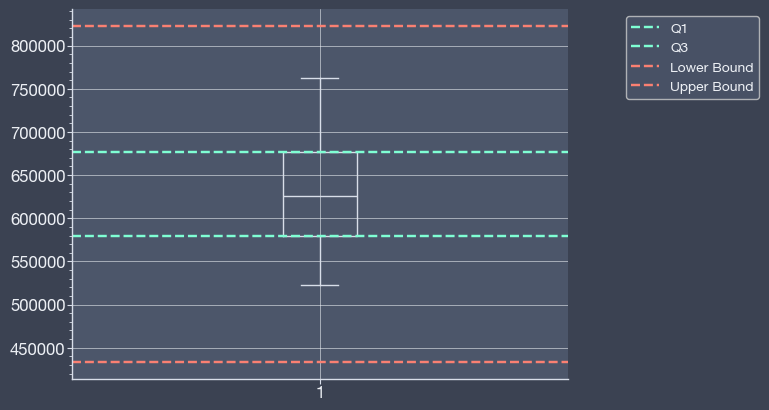

The average emissions level over the specified period is 629422.90625 units.There is a moderate amount of variability in the emissions data, with emissions values typically deviating from the average by approximately 56625.66070844867 units.
The maximum value is 762474 carbon dioxide equivalents (CO2e), as established by the United Nations Framework Convention on Climate Change (UNFCCC), corresponding to the year of 2011
The minimum value is 523162 carbon dioxide equivalents (CO2e), corresponding to the year of 1994
Lower bound for outliers: 433553.875
Upper bound for outliers: 822766.875
Outliers: Empty DataFrame
Columns: [sector, time, Greenlands total emission of greenhousegasses]
Index: []
There are not outliers in this dataset


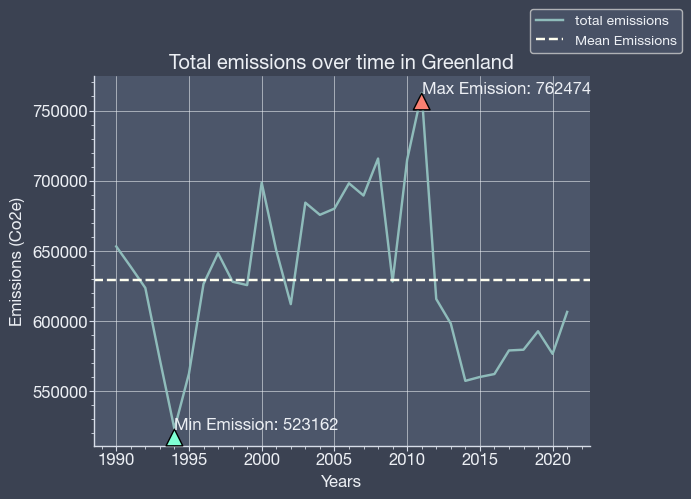

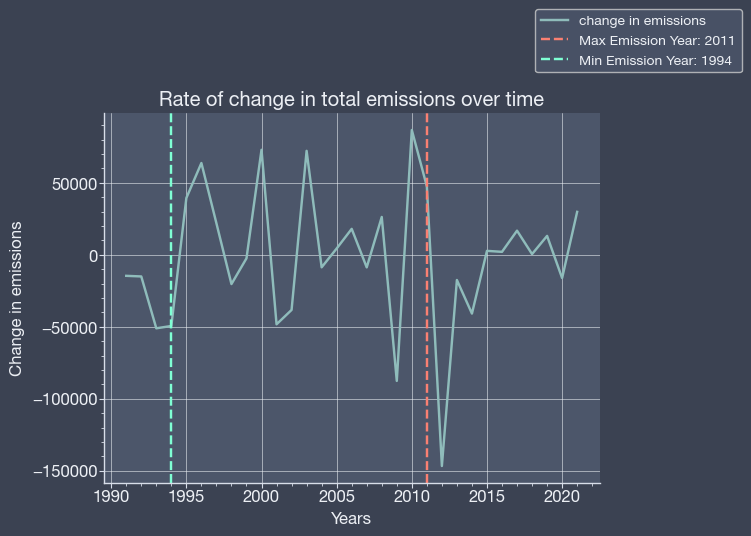

R-squared: 0.6160066600364945
RMSE: 34536.747306330726
Slope of Regression Line: 6.229180266273012


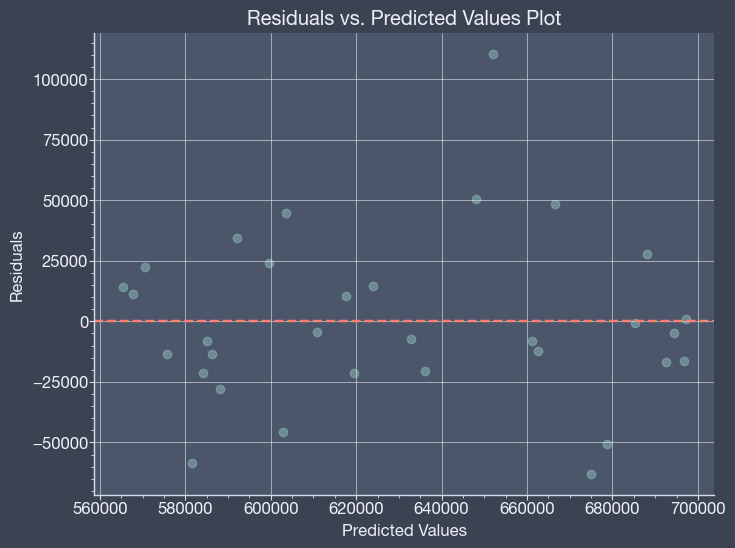

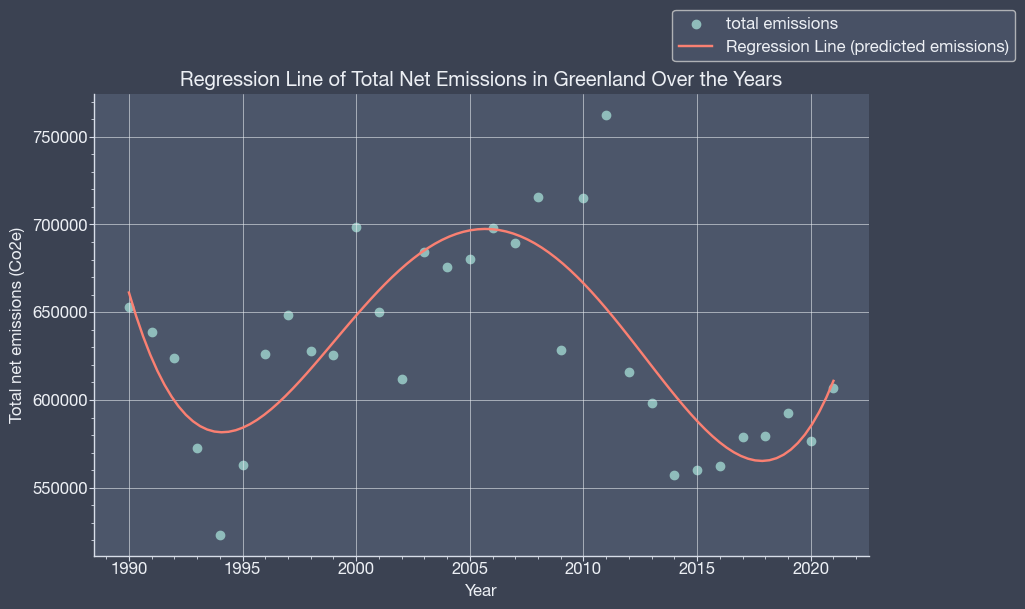

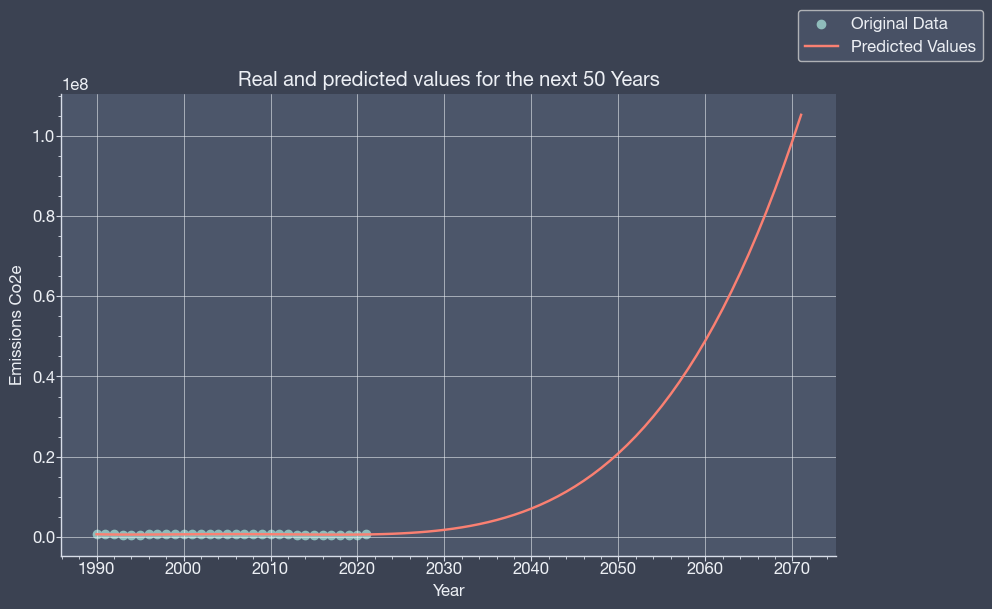

In [25]:
%run greenland_greenhouse_emissions_total.ipynb

In [26]:
#create df with total emissions by year
total_emissions_df = df[df['sector'].isin(['Total (net emissions)'])]
total_emissions_df = total_emissions_df.drop(columns=['greenhousegas'])

In [27]:
#import weather data
climate_df = pd.read_csv('data/Air temperature by measuring, time, weather station and month.csv')

# Drop rows where measuring is 'Maximum temperature' or 'Minimum temperature'. We just want the averages
climate_df = climate_df[~((climate_df['measuring'] == 'Maximum temperature') | (climate_df['measuring'] == 'Minimum temperature'))]

In [28]:
#clean invalide values, in this case ... and .. from my dataframe
climate_df['Air temperature'] = climate_df['Air temperature'].replace('...', np.nan)
climate_df['Air temperature'] = climate_df['Air temperature'].replace('..', np.nan)

#transform input in temperature column from string to float
climate_df['Air temperature'] = climate_df['Air temperature'].astype(float)

In [29]:
# Group by year and calculate the mean of 'Air temperature' throughout the years
mean_temperature_by_year = climate_df.groupby('time')['Air temperature'].mean()

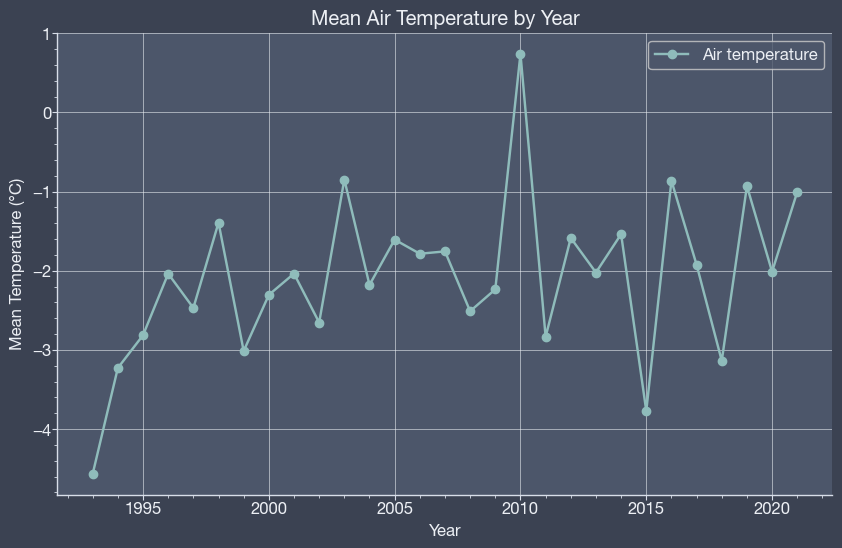

In [30]:
# Plot the data
plt.figure(figsize=(10, 6))

mean_temperature_by_year.plot(kind='line', marker='o')

plt.title('Mean Air Temperature by Year')
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.grid(True)

plt.savefig('mean air temperature by year.jpg', bbox_inches='tight')

plt.show()

In [31]:
merged_df = pd.merge(total_emissions_df, mean_temperature_by_year, on='time', how='inner')

In [32]:
merged_df.head()

,sector,time,Greenlands total emission of greenhousegasses,Air temperature
0,Total (net emissions),1993,572582,-4.565363
1,Total (net emissions),1994,523162,-3.227869
2,Total (net emissions),1995,562656,-2.814216
3,Total (net emissions),1996,626461,-2.036574
4,Total (net emissions),1997,648374,-2.470044


In [33]:
#Find the index of the maximum value
max_index = merged_df['Air temperature'].idxmax()

# Get the corresponding year value using the index
max_year = merged_df.loc[max_index, 'time']

# Get the maximum value
max_value = merged_df['Air temperature'].max()

#Find the index of the minimum value
min_index = merged_df['Air temperature'].idxmin()

# Get the corresponding year value using the index
min_year = merged_df.loc[min_index, 'time']

# Get the minimum value
min_value = merged_df['Air temperature'].min()


print(f'The maximum average air temperature was of {max_value} degrees celsius, corresponding to the year {max_year}')

print(f'The minimum average air temperature was of {min_value} degrees celsius, corresponding to the year {min_year}')

The maximum average air temperature was of 0.7410714285714286 degrees celsius, corresponding to the year 2010
The minimum average air temperature was of -4.5653631284916205 degrees celsius, corresponding to the year 1993


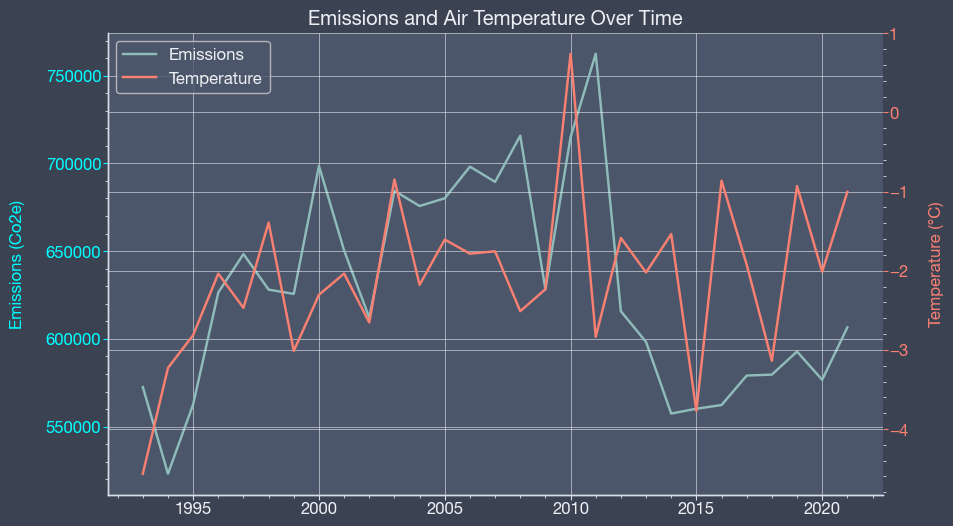

In [34]:
# Plot emissions
plt.figure(figsize=(10, 6))

emissions_line, = plt.plot(merged_df['time'], merged_df['Greenlands total emission of greenhousegasses'], label='Emissions')

plt.ylabel('Emissions (Co2e)', color='cyan', labelpad=15)  # Label for primary y-axis
plt.tick_params('y', colors='cyan') # color for primary y-axis

# Create a secondary y-axis
plt.twinx()

temperature_line, = plt.plot(merged_df['time'], merged_df['Air temperature'], color='salmon', label='Air temperature')

plt.ylabel('Temperature (°C)', color='salmon', labelpad=15)  # Label for secondary y-axis
plt.tick_params('y', colors='salmon') # color for secondary y-axis

# Add labels and legend
plt.xlabel('Year')

plt.title('Emissions and Air Temperature Over Time')
plt.legend([emissions_line, temperature_line], ['Emissions', 'Temperature'], loc='upper left')

plt.savefig('Emissions and air temperature over time.jpg', bbox_inches='tight')


plt.show()

Preform correlation analysis to see if there is a statistically significant correlation between emissions and air temperature throughout time. First let's plot the data and see if there seems to be any type of linear relationship:

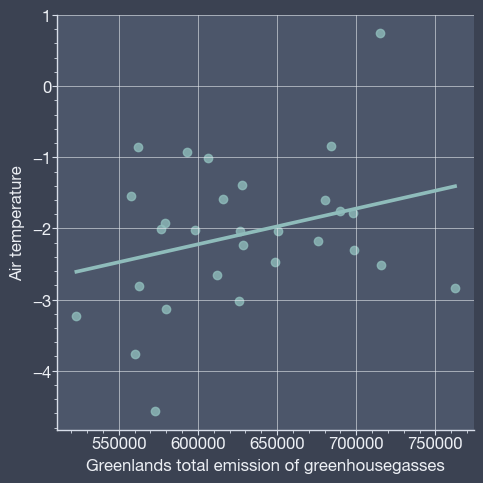

In [35]:
import seaborn as sns
sns.lmplot(x='Greenlands total emission of greenhousegasses',y='Air temperature', data=merged_df, ci=None)

plt.show()

In [36]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(merged_df['Air temperature'], merged_df['Greenlands total emission of greenhousegasses'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Check if the correlation is statistically significant (a significance level of 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation coefficient: 0.2924122998471503
P-value: 0.12373385507127814
The correlation is not statistically significant.


Let's perform polynomial regression to see if we can predict temperature based on emissions and years. This model may capture potential non-linear relationships between emissions, years, and temperature.

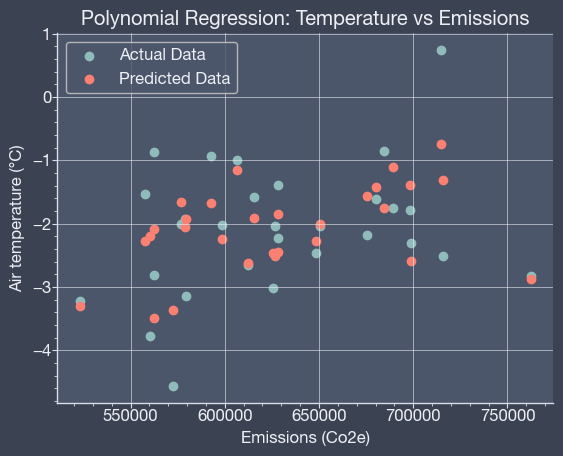

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

years = merged_df['time'].values.reshape(-1, 1)  # Reshape to a 2D array
emissions = merged_df['Greenlands total emission of greenhousegasses']
temperature = merged_df['Air temperature']


# Combine emissions and years into a single array np.column_stack
X = np.column_stack((emissions, years))

# Create polynomial features up to third degree
poly = PolynomialFeatures(degree=3) 
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
model = LinearRegression()
model.fit(X_poly, temperature)

# Predict temperatures using the model
temperature_pred = model.predict(X_poly)

# Visualize the results
plt.scatter(emissions, temperature, label='Actual Data')
plt.scatter(emissions, temperature_pred, color='salmon', label='Predicted Data')
plt.xlabel('Emissions (Co2e)')
plt.ylabel('Air temperature (°C)')
plt.title('Polynomial Regression: Temperature vs Emissions')
plt.legend()

plt.savefig('Polynomial regression:temperature vs emissions.jpg', bbox_inches='tight')

plt.show()


In [38]:
# Calculate evaluation metrics
r_squared = r2_score(temperature, temperature_pred)
rmse = np.sqrt(mean_squared_error(temperature, temperature_pred))

In [39]:
print(r_squared, rmse)

0.4447808828622811 0.7465369352109437


The R-squared value of approximately 0.445 indicates that the model explains about 44.5% of the variance in the temperature data, while the RMSE value of approximately 0.747 indicates the average deviation of the predicted temperature values from the actual temperature values.
This model has a moderate level of explanatory power, and can indicate a potential moderate relationship between greenhouse gas emissions and temperature throughout the years in Greenland

Let's plot the real temperature values and the predicted temperature values:

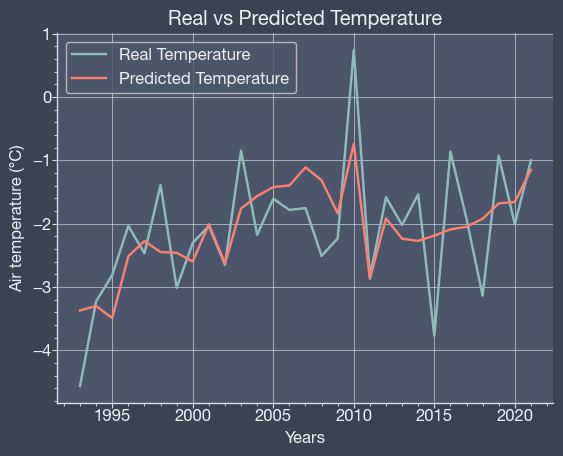

In [40]:
# Plot the real temperature
plt.plot(years, temperature, label='Real Temperature')

# Plot the predicted temperature
plt.plot(years, temperature_pred, color='salmon', label='Predicted Temperature')

plt.xlabel('Years')
plt.ylabel('Air temperature (°C)')
plt.title('Real vs Predicted Temperature')
plt.legend()

plt.savefig('Real vs predicted temperature.jpg', bbox_inches='tight')


plt.show()

Let's see if there is a correlation between real temperature values and predicted values:

In [41]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(temperature, temperature_pred)

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

# Check if the correlation is statistically significant (a significance level of 0.05)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation coefficient: 0.6669252637271751
P-value: 7.784461777419342e-05
The correlation is statistically significant.
